In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


('2017-08-23',)

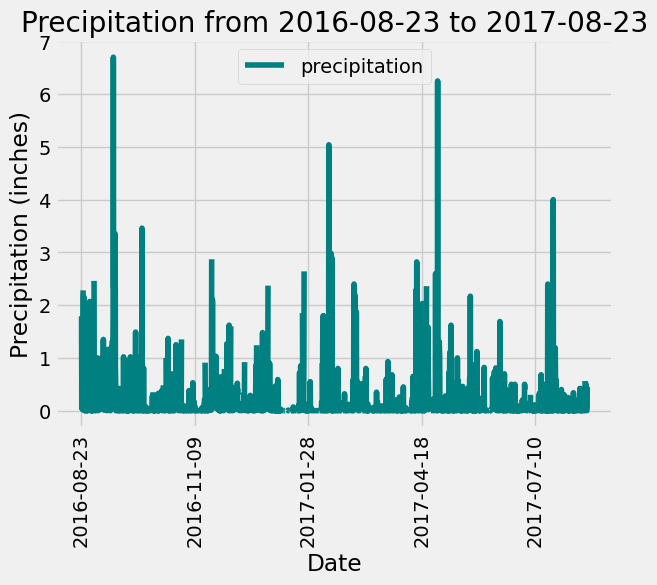

<Figure size 2000x1000 with 0 Axes>

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.date(2017,8,23)
#print(most_recent_date)

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print(one_year_ago)

# # Perform a query to retrieve the data and precipitation scores
all_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_df = pd.DataFrame(all_precip, columns = ["date", "precipitation"])
#one_year_df

# # Sort the dataframe by date
sorted_one_year_df = one_year_df.sort_values(by = ['date']) 
sorted_one_year_df = sorted_one_year_df.set_index('date')
#sorted_one_year_df

# # # Use Pandas Plotting with Matplotlib to plot the data
plot_rain = sorted_one_year_df.plot(rot = 90, use_index=True, color = 'teal')
plt.title(f'Precipitation from {one_year_ago} to {most_recent_date}')
plt.ylabel("Precipitation (inches)")
plt.xlabel("Date")
xloc = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
plt.figure(figsize=(20,10))
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(sorted_one_year_df.describe())

       precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the datase
number_stations = session.query(Station).count()
number_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calculations = [func.min(Measurement.tobs),
                func.max(Measurement.tobs),
                func.avg(Measurement.tobs)]
most_active_station_totals = session.query(*calculations).filter(Measurement.station == "USC00519281").all()
most_active_station_totals

[(54.0, 85.0, 71.66378066378067)]

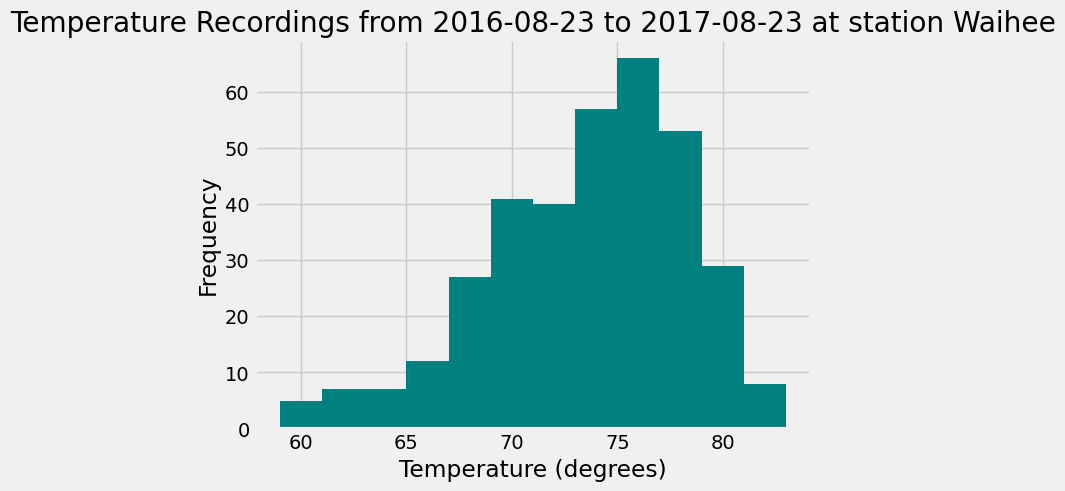

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_annual = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281")\
    .filter(Measurement.date >= '2016-08-23').all()
#active_station_annual

plt.hist(np.ravel(active_station_annual), bins=12, color = 'teal')
plt.title(f'Temperature Recordings from {one_year_ago} to {most_recent_date} at station Waihee')
plt.ylabel("Frequency")
plt.xlabel("Temperature (degrees)")
plt.show()

# Close Session

In [89]:
# Close Session
session.close()

[{'date': '2016-08-23', 'prcp': 0.0},
 {'date': '2016-08-24', 'prcp': 0.08},
 {'date': '2016-08-25', 'prcp': 0.08},
 {'date': '2016-08-26', 'prcp': 0.0},
 {'date': '2016-08-27', 'prcp': 0.0},
 {'date': '2016-08-28', 'prcp': 0.01},
 {'date': '2016-08-29', 'prcp': 0.0},
 {'date': '2016-08-30', 'prcp': 0.0},
 {'date': '2016-08-31', 'prcp': 0.13},
 {'date': '2016-09-01', 'prcp': 0.0},
 {'date': '2016-09-02', 'prcp': 0.0},
 {'date': '2016-09-03', 'prcp': 0.0},
 {'date': '2016-09-04', 'prcp': 0.03},
 {'date': '2016-09-05', 'prcp': None},
 {'date': '2016-09-06', 'prcp': None},
 {'date': '2016-09-07', 'prcp': 0.05},
 {'date': '2016-09-08', 'prcp': 0.0},
 {'date': '2016-09-09', 'prcp': 0.03},
 {'date': '2016-09-10', 'prcp': 0.0},
 {'date': '2016-09-11', 'prcp': 0.05},
 {'date': '2016-09-12', 'prcp': 0.0},
 {'date': '2016-09-13', 'prcp': 0.02},
 {'date': '2016-09-14', 'prcp': 1.32},
 {'date': '2016-09-15', 'prcp': 0.42},
 {'date': '2016-09-16', 'prcp': 0.06},
 {'date': '2016-09-17', 'prcp': 0.05